ANÁLISE DE DADOS TITANIC

Membros da equipe:
- Luis Henrique da Silva Araújo
- Rayza Dias Alves
- Ayrton Oliveira
- Pedro Leal
- Leticia Mendes
- Marcos Paraguaio
- Gilberto Quintino

In [176]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# importação da base de dados
tabela_train = pd.read_csv('train.csv')
#print(tabela_train)

In [178]:
# visualizar valores ausentes
tabela_train.isna()
# true = valor ausente
# false = valor presente

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [179]:
# estatísticas descritivas para colunas numéricas
tabela_train.describe(include='all') # include='all' para incluir colunas categóricas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [180]:
# Padronizar colunas 
tabela_train.columns = tabela_train.columns.str.lower().str.replace(' ', '_')

In [181]:
# Substituindo valores ausentes

# Substituir valores ausentes em 'age' pela idade mais frequente
tabela_train['age'].fillna(tabela_train['age'].mode()[0], inplace=True)

#tabela_train['age'].fillna(0, inplace=True) # substitui valores ausentes por 0
tabela_train['embarked'] = tabela_train['embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
tabela_train['embarked'].fillna('Não Informado', inplace=True) # substitui valores ausentes por 'Não Informado'
tabela_train['cabin'].fillna('Não Informado', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6568\1667239308.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tabela_train['age'].fillna(tabela_train['age'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6568\1667239308.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [182]:
# Tratando tipos de dados
tabela_train['age'] = tabela_train['age'].astype('int64')
tabela_train['fare'] = tabela_train['fare'].astype('int64')
tabela_train['cabin'] = tabela_train['cabin'].astype('string')
tabela_train['embarked'] = tabela_train['embarked'].astype('string')
tabela_train['sex'] = tabela_train['sex'].astype('string')
tabela_train['name'] = tabela_train['name'].astype('string')

In [183]:
# visualização da tabela
print(tabela_train)
#print(tabela_train.info())
# info() para ver a quantidade de valores não nulos
# dtype = tipo de dado da coluna

     passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex  age  sibsp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ... 

In [184]:
print(tabela_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   passengerid  891 non-null    int64 
 1   survived     891 non-null    int64 
 2   pclass       891 non-null    int64 
 3   name         891 non-null    string
 4   sex          891 non-null    string
 5   age          891 non-null    int64 
 6   sibsp        891 non-null    int64 
 7   parch        891 non-null    int64 
 8   ticket       891 non-null    object
 9   fare         891 non-null    int64 
 10  cabin        891 non-null    string
 11  embarked     891 non-null    string
dtypes: int64(7), object(1), string(4)
memory usage: 83.7+ KB
None


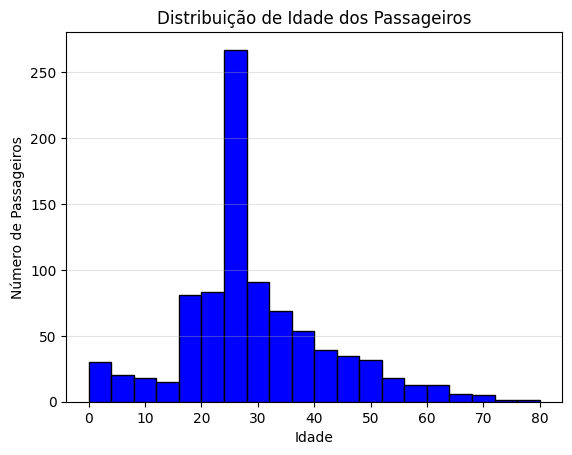

In [185]:
# Histograma da idade
plt.hist(tabela_train['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.grid(axis='y', alpha=0.35)
plt.show()

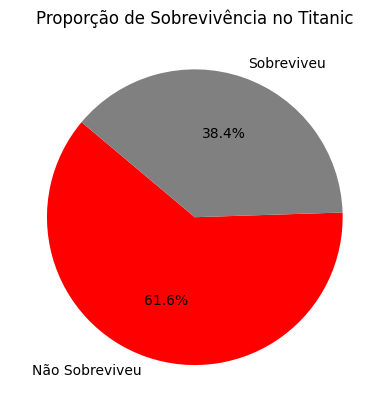

In [186]:
# Gráfico de Pizza 'Survived'
survived_counts = tabela_train['survived'].value_counts()
labels = ['Não Sobreviveu', 'Sobreviveu']
colors = ['red', 'gray']
plt.Figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Sobrevivência no Titanic')
plt.show()

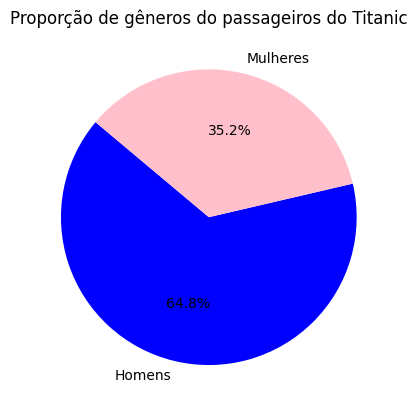

In [187]:
# Gráfico de Pizza 'Sex'
sex_counts = tabela_train['sex'].value_counts()
labels = ['Homens', 'Mulheres']
colors = ['blue', 'pink']
plt.Figure(figsize=(10,10))
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de gêneros do passageiros do Titanic')
plt.show()



In [191]:
#tabela_train.isna()
#tabela_train.describe(include='all')